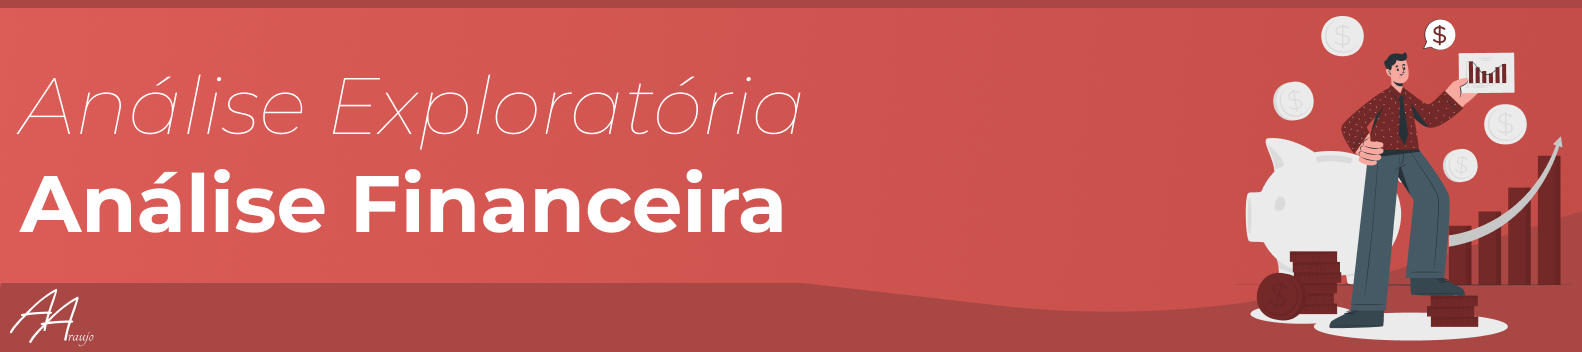

# Exploração de dados Setor Financeiro

A empresa Logit do ramo de Logística, busca otimizar a gestão de seu fluxo de caixa e obter uma visão abrangente de suas receitas e despesas para um planejamento financeiro mais eficaz. Portanto, é solicitado a resposta de alguns indicadores para uma análise detalhada e precisa sobre o cenário dos negócios, auxiliando nas tomadas de decisões estratégicas e no gerenciamente eficiente de recursos.

O objetivo desta análise exploratória é responder as perguntas de negócios para posteriomente servir como base para o painel de visualização (Dashboard).

1. **Análise do fluxo de caixa:** Monitorar e comparar receitas e despesas ao longo do tempo, identificando períodos de maior variação e possibilitando o planejamento de estratégias de contenção ou investimento;
2. **Saldo bancário por instituição:** Verificar o saldo distribuído entre os bancos para otimizar a distribuição de recursos e diminuir custos bancários;
3. **Categorias de movimentações:** Entender a natureza das transações para identificar áreas de maior custo e verificar a contribuição de cada categoria para as receitas e despesas;
4. **Receitas por serviços:** Analisar os serviços que trazem mais receita para identificar oportunidades de investimento e crescimento;
5. **Receita total:** Medir o total de receitas geradas durante o período analisada para entender a lucratividade;
6. **Despesas totais:** Quantificar as despesas totais para identificar áreas de redução de custos;
7. **Saldo financeiro:** Comparar receita e despesa para obter o saldo final disponível;
8. Movimentações financeiras: Classificar e sumarizar os diferentes tipos de movimentações para identificar padrões e oportunidade de melhoria;
9. **Saldo por banco:** Verificar a distribuição do saldo entre os bancos para otimizar as operações financeiras.

Base de dados: Dados sintéticos disponibilizados no Power Bi Discovery (Karine Lago e Letícia S.)

In [70]:
--Análise do fluxo de caixa
SELECT 
    c.Tipo,
    c.Categoria,
    FORMAT(SUM(e.Valor),'c') AS Valor
FROM Banco b
INNER JOIN extrato e ON b.ID_Banco = e.ID_Banco
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria
WHERE Categoria IS NOT NULL
GROUP BY c.Tipo, c.Categoria
ORDER BY tipo ASC, SUM(e.Valor) DESC

(15 rows affected)

Total execution time: 00:00:00.041

Tipo,Categoria,Valor
Entrada,Movimentações,"R$ 33.427.488,65"
Entrada,Receitas de Serviços,"R$ 22.523.665,51"
Entrada,Receitas de Produtos,"R$ 3.051.633,39"
Entrada,Receitas Financeiras,"R$ 449.089,70"
Saída,Despesas Comerciais,"R$ 9.256.309,12"
Saída,Despesas Tributárias,"R$ 3.473.262,41"
Saída,Despesas Administrativas,"R$ 3.467.316,18"
Saída,Custos,"R$ 1.401.501,49"
Saída,Despesas Logísticas,"R$ 969.564,29"
Saída,Despesas Gerais,"R$ 615.243,69"


In [47]:
--Saldo bancário por instituição
WITH x AS(
SELECT
    b.Banco,
    ROUND(SUM(IIF(c.Tipo = 'Entrada',e.Valor,0)),2) AS 'Entrada',
    ROUND(SUM(IIF(c.Tipo = 'Saída',e.Valor,0)),2) AS 'Saída'
FROM Banco b
INNER JOIN extrato e ON b.ID_Banco = e.ID_Banco
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria
GROUP BY b.Banco
)
SELECT
    Banco,
    FORMAT(Entrada - Saída,'c','pt-BR') AS Saldo
FROM x
ORDER BY Saldo DESC

(8 rows affected)

Total execution time: 00:00:00.038

Banco,Saldo
Bradesco,"R$ 9.239.366,91"
Caixa Inicial,"R$ 83.159,94"
Cartão de Crédito,"-R$ 68,08"
Ajustes e Devoluções,"-R$ 4.544,00"
Itaú,"R$ 15.367.748,84"
Banco do Brasil,"R$ 12.431.822,90"
Inter,"R$ 1.382.571,00"
Permutas,"R$ 0,00"


In [86]:
--Categorias de movimentações
WITH x AS(
SELECT
    Categoria,
    SUM(IIF(c.Tipo = 'Entrada',e.Valor,0)) AS 'Entrada',
    SUM(IIF(c.Tipo = 'Saída',e.Valor,0)) AS 'Saída'
FROM cadastros c
INNER JOIN extrato e ON c.ID_Categoria = e.ID_Categoria
WHERE Categoria IS NOT NULL
GROUP BY Categoria
)
SELECT
    Categoria,
    FORMAT(Entrada, 'c') AS 'Entrada',
    FORMAT(Saída, 'c') AS 'Saída'
FROM x
ORDER BY Categoria ASC

(15 rows affected)

Total execution time: 00:00:00.033

Categoria,Entrada,Saída
Custos,"R$ 0,00","R$ 1.401.501,49"
Despesas Administrativas,"R$ 0,00","R$ 3.467.316,18"
Despesas com Marketing e Publicidade,"R$ 0,00","R$ 478.590,58"
Despesas Comerciais,"R$ 0,00","R$ 9.256.309,12"
Despesas Financeiras,"R$ 0,00","R$ 48.517,52"
Despesas Gerais,"R$ 0,00","R$ 615.243,69"
Despesas Logísticas,"R$ 0,00","R$ 969.564,29"
Despesas Operacionais,"R$ 0,00","R$ 383.623,84"
Despesas Tributárias,"R$ 0,00","R$ 3.473.262,41"
Gastos com Pessoal,"R$ 0,00","R$ 607.169,26"


In [90]:
--Receita por Serviço
WITH x AS(
SELECT
    Natureza,
    SUM(IIF(c.Tipo = 'Entrada',e.Valor,0)) AS 'Entrada',
    SUM(IIF(c.Tipo = 'Saída',e.Valor,0)) AS 'Saída'
FROM cadastros c
INNER JOIN extrato e ON c.ID_Categoria = e.ID_Categoria
WHERE Categoria IS NOT NULL
GROUP BY Natureza
)
SELECT
    Natureza,
    FORMAT(Entrada, 'c') AS 'Entrada',
    FORMAT(Saída, 'c') AS 'Saída'
FROM x
ORDER BY Natureza ASC

(60 rows affected)

Total execution time: 00:00:00.036

Natureza,Entrada,Saída
Agência de Publicidade,"R$ 0,00","R$ 193.050,00"
Ajuste Caixa,"R$ 0,00","R$ 205.670,63"
"Alimentação (Almoço, Cafés)","R$ 0,00","R$ 16.344,90"
Aluguel Comercial,"R$ 0,00","R$ 243.284,10"
Anúncios e Propagandas,"R$ 0,00","R$ 221.285,73"
Aplicações Financeiras,"R$ 14.918,46","R$ 0,00"
Apoio Aduaneiro,"R$ 727.822,19","R$ 0,00"
Aporte Financeiro,"R$ 434.171,24","R$ 0,00"
Aquisição de Equipamentos,"R$ 0,00","R$ 250.746,12"
Armazenagem de Estoque,"R$ 0,00","R$ 302.280,52"


In [81]:
--Receita total
SELECT 
   FORMAT(SUM(IIF(c.Tipo = 'Entrada', e.Valor,0)),'c') AS Receita
FROM extrato e
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria

(1 row affected)

Total execution time: 00:00:00.020

Receita
"R$ 59.451.902,00"


In [82]:
--Despesas total
SELECT 
   FORMAT(SUM(IIF(c.Tipo = 'Saída', e.Valor,0)),'c') AS Despesa
FROM extrato e
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria

(1 row affected)

Total execution time: 00:00:00.018

Despesa
"R$ 20.951.844,50"


In [83]:
--Saldo
SELECT 
  FORMAT(SUM(IIF(c.Tipo = 'Entrada', e.Valor,0)) - SUM(IIF(c.Tipo = 'Saída', e.Valor,0)),'c') AS Saldo
FROM extrato e
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria

(1 row affected)

Total execution time: 00:00:00.026

Saldo
"R$ 38.500.057,50"


In [87]:
SELECT * FROM cadastros

(67 rows affected)

Total execution time: 00:00:00.016

ID_Categoria,Tipo,Natureza,Categoria,Tipo_movimentacao,Operacional
1,Saída,Despesas Bancárias,Despesas Financeiras,Variável,Operacional
2,Entrada,Transporte de Grandes Volumes,Receitas de Serviços,Receita,Operacional
3,Entrada,Viagens,Receitas de Produtos,Receita,Operacional
4,Entrada,Aplicações Financeiras,Receitas Financeiras,Receita,Não Operacional
5,Saída,Materiais e Embalagens,Custos,Variável,Operacional
6,Saída,Passagens Aéreas,Custos,Variável,Operacional
7,Saída,Hospedagem Sites,Despesas Administrativas,Fixo,Operacional
8,Saída,Uber e Táxi,Custos,Variável,Operacional
9,Saída,Hospedagem,Custos,Variável,Operacional
10,Entrada,Transporte de Mercadorias,Receitas de Serviços,Receita,Operacional


In [110]:
WITH x AS(
SELECT 
    YEAR([Data]) AS Ano,
    MONTH([Data]) AS Mes,
    FORMAT(SUM(IIF(c.Tipo = 'Entrada', e.valor,0)),'c') AS Receita,
    FORMAT(SUM(IIF(c.Tipo = 'Saída', e.valor,0)),'c') AS Despesa,
    SUM(IIF(c.Tipo = 'Entrada', e.valor,0))-SUM(IIF(c.Tipo = 'Saída', e.valor,0)) AS Saldo
FROM extrato e
INNER JOIN cadastros c ON e.ID_Categoria = c.ID_Categoria
GROUP BY YEAR([Data]), MONTH([Data])
)
SELECT 
    Ano, Mes, Receita, Despesa,
    FORMAT(Saldo,'c') AS Saldo,
    COALESCE(FORMAT(1.0 * (Saldo - LAG(Saldo,1)OVER(ORDER BY Ano ASC, Mes ASC))/Saldo,'0.00%'),'-') AS MoM
FROM x
ORDER BY Ano ASC, Mes ASC

(24 rows affected)

Total execution time: 00:00:00.038

Ano,Mes,Receita,Despesa,Saldo,MoM
2022,1,"R$ 1.862.909,76","R$ 966.132,33","R$ 896.777,43",-
2022,2,"R$ 3.596.638,68","R$ 1.407.493,85","R$ 2.189.144,82","59,04%"
2022,3,"R$ 3.533.930,67","R$ 1.152.463,65","R$ 2.381.467,02","8,08%"
2022,4,"R$ 1.814.529,53","R$ 758.311,76","R$ 1.056.217,77","-125,47%"
2022,5,"R$ 2.976.189,92","R$ 556.367,24","R$ 2.419.822,68","56,35%"
2022,6,"R$ 2.610.726,54","R$ 811.821,41","R$ 1.798.905,14","-34,52%"
2022,7,"R$ 2.545.444,86","R$ 1.148.089,10","R$ 1.397.355,76","-28,74%"
2022,8,"R$ 7.175.256,08","R$ 1.361.813,73","R$ 5.813.442,35","75,96%"
2022,9,"R$ 1.483.384,74","R$ 870.968,69","R$ 612.416,05","-849,26%"
2022,10,"R$ 2.765.302,35","R$ 621.497,24","R$ 2.143.805,11","71,43%"
